In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Load the csv file
train_data = pd.read_csv('train_data_preprocessed_v2.csv')
test_data = pd.read_csv('test_data_preprocessed_v2.csv')

In [3]:
x_train = train_data[train_data.columns[:-1]]
y_train = train_data[train_data.columns[-1]]
x_test = test_data[test_data.columns[:-1]]
y_test = test_data[test_data.columns[-1]]

Cross-Validation Scores: [0.88305225 0.88305225 0.88291402 0.88303608 0.88303608]
Mean Cross-Validation Score: 0.8830181385725526
Best Hyperparameters: {'C': 100}
Best Accuracy: 0.8946858317373971


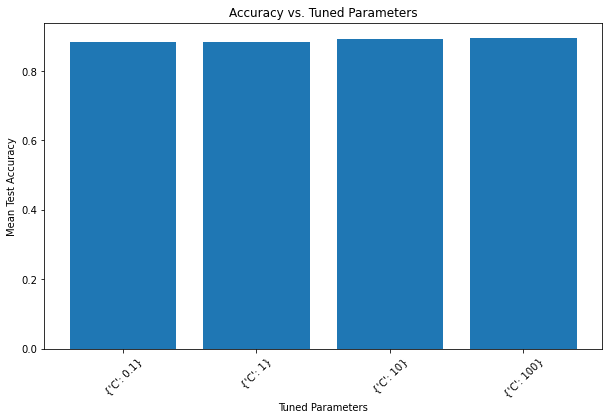

Accuracy on Test Set: 0.8921817980758597
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94      7985
           1       0.62      0.20      0.31      1058

    accuracy                           0.89      9043
   macro avg       0.76      0.59      0.62      9043
weighted avg       0.87      0.89      0.87      9043



In [4]:
# Step 1: Initialize an SVM classifier with RBF kernel and default gamma
clf = SVC(kernel='rbf', gamma='scale', random_state=42)

# Step 2: Perform 5-fold cross-validation and record cross-validation scores
cross_val_scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

# Step 3: Choose hyperparameters to tune and define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Specify 5 different C values
}

# Step 4: Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Step 5: Print the best hyperparameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Step 6: Plot accuracy vs. tuned parameter values
tuned_parameters = [str(param) for param in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.bar(tuned_parameters, mean_test_scores)
plt.xlabel('Tuned Parameters')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Tuned Parameters')
plt.xticks(rotation=45)
plt.show()

# Step 7: Train the final model with the best hyperparameters
best_clf = SVC(kernel='rbf', gamma='scale', random_state=42, **best_params)
best_clf.fit(x_train, y_train)

# Step 8: Make predictions on the test set
y_pred = best_clf.predict(x_test)

# Step 9: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))


Cross-Validation Scores: [0.89079348 0.89189936 0.88885817 0.88967234 0.88828978]
Mean Cross-Validation Score: 0.8899026254387081
Best Hyperparameters: {'degree': 1}
Best Accuracy: 0.8932480959519505


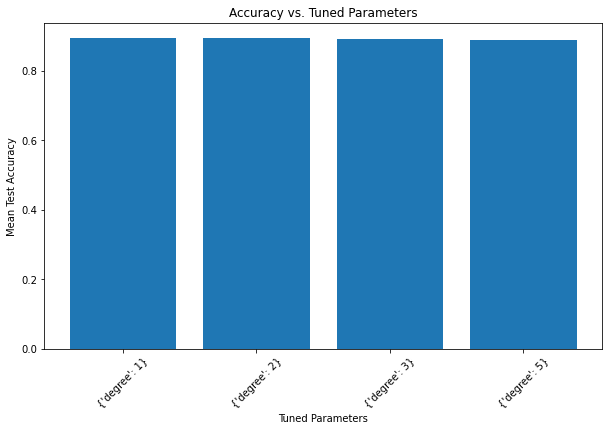

Accuracy on Test Set: 0.8912971359062258
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      7985
           1       0.62      0.18      0.28      1058

    accuracy                           0.89      9043
   macro avg       0.76      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



In [5]:
# Step 1: Initialize an SVM classifier with polynomial kernel and C=10
clf = SVC(kernel='poly', C=10, random_state=42)

# Step 2: Perform 5-fold cross-validation and record cross-validation scores
cross_val_scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Mean Cross-Validation Score:", np.mean(cross_val_scores))

# Step 3: Choose hyperparameters to tune and define parameter grid
param_grid = {
    'degree': [1, 2, 3, 5],  # Specify different degree values
}

# Step 4: Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Step 5: Print the best hyperparameters and corresponding accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_
print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_accuracy)

# Step 6: Plot accuracy vs. tuned parameter values
tuned_parameters = [str(param) for param in grid_search.cv_results_['params']]
mean_test_scores = grid_search.cv_results_['mean_test_score']

plt.figure(figsize=(10, 6))
plt.bar(tuned_parameters, mean_test_scores)
plt.xlabel('Tuned Parameters')
plt.ylabel('Mean Test Accuracy')
plt.title('Accuracy vs. Tuned Parameters')
plt.xticks(rotation=45)
plt.show()

# Step 7: Train the final model with the best hyperparameters
best_clf = SVC(kernel='poly', C=10, random_state=42, **best_params)
best_clf.fit(x_train, y_train)

# Step 8: Make predictions on the test set
y_pred = best_clf.predict(x_test)

# Step 9: Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Set:", accuracy)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))
